In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(r'/content/drive/MyDrive/WeatherData/Weather Test Data.csv')
test = pd.read_csv(r'/content/drive/MyDrive/WeatherData/Weather Training Data.csv')
df = pd.concat([train,test])


## clean up data
df.reset_index(inplace = True)
df.drop(['index','row ID','RainToday', 'Sunshine','Evaporation', 'Location', 'WindGustDir','WindDir9am', 'WindDir3pm'],axis = 'columns', inplace = True)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,NaN
1,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,NaN
2,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,NaN
3,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,NaN
4,15.9,18.6,15.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,NaN


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Identify categorical and numerical columns
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(include='float64').columns

# Create a column transformer
transformers = [
    ('cat', SimpleImputer(strategy='most_frequent'), cat_columns),
    ('num', SimpleImputer(strategy='median'), num_columns)
]

ct = ColumnTransformer(transformers, remainder='passthrough')

# Transform the data
transformed_data = ct.fit_transform(df)
df_transformed = pd.DataFrame(transformed_data, columns=np.concatenate((cat_columns, num_columns)))

# Label encode categorical columns
label_encoder = LabelEncoder()
df_transformed[cat_columns] = df_transformed[cat_columns].apply(lambda col: label_encoder.fit_transform(col))

df_transformed.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0
1,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0
2,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0.0
3,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0.0
4,15.9,18.6,15.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,0.0


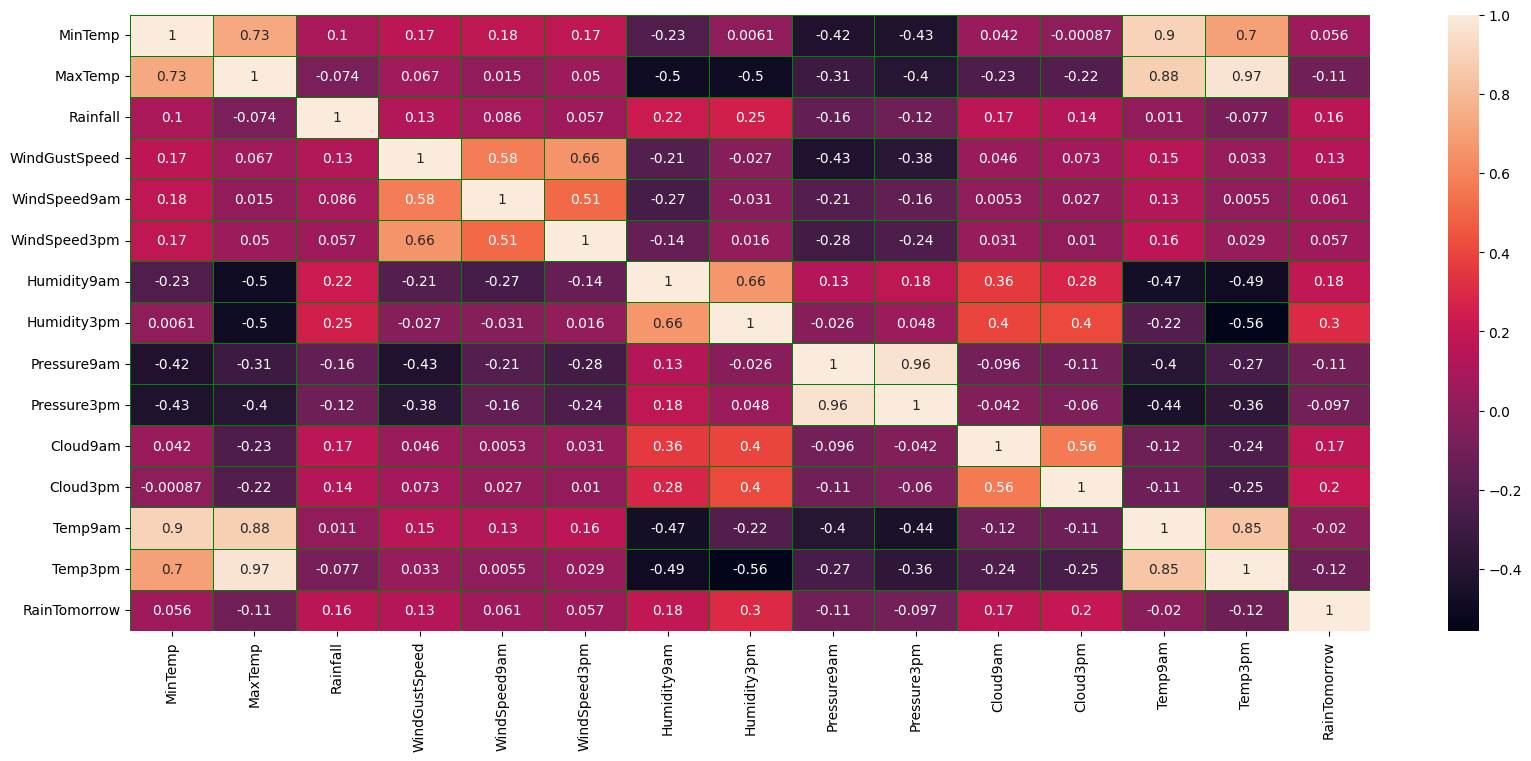

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(),annot = True,linewidth = 0.5,linecolor = 'green')
plt.show()

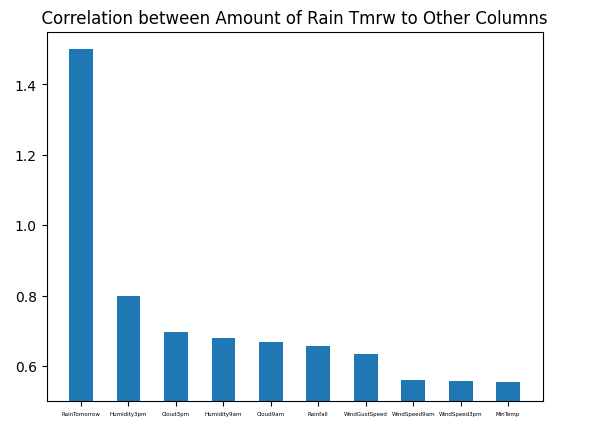

In [ ]:
valInf = dict(df.corr()['RainTomorrow'].sort_values(ascending = False))
valInf = {key:valInf[key] for key in valInf if valInf[key]>0}

plt.title('      Correlation between Amount of Rain Tmrw to Other Columns      ')
plt.bar(valInf.keys(),valInf.values(), 0.5, 0.5)
plt.xticks(fontsize=4)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X,y = df[[key for key in info.keys() if key!='RainTomorrow']],df['RainTomorrow']
xtrain,xtest, ytrain,ytest = train_test_split(X,y,shuffle = True, test_size = 0.25,random_state = 101)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [ ]:
print("Shape of xtrain:", xtrain.shape)
print("Shape of ytrain:", ytrain.shape)


Shape of xtrain: (106644, 9)
Shape of ytrain: (106644,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 25,criterion = 'gini')
rfc.fit(xtrain,ytrain)


RandomForestClassifier(max_depth=25)

In [ ]:
from sklearn.metrics import accuracy_score

ypredRFC = rfc.predict(xtest)
ypredTRFC = rfc.predict(xtrain)

print('🎉 Test set accuracy is:', accuracy_score(ytest,ypredRFC))
print('🎉 Train set accuracy is:', accuracy_score(ytrain,ypredTRFC))


🎉 Test set accuracy is: 0.8972966890770486
🎉 Train set accuracy is: 0.9969618543940587
